In [18]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [19]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [23]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [24]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [26]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [27]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5525f451f3e4d4614602a50b54a7446c


In [30]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5525f451f3e4d4614602a50b54a7446c&q=Boston


In [32]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather


<Response [200]>

In [33]:
city_weather.status_code

200

In [34]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [35]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [36]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":65.03,"feels_like":64.67,"temp_min":61.41,"temp_max":68.49,"pressure":1018,"humidity":73},"visibility":10000,"wind":{"speed":1.99,"deg":13,"gust":8.99},"clouds":{"all":69},"dt":1632577337,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1632566099,"sunset":1632609398},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [37]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 65.03,
  'feels_like': 64.67,
  'temp_min': 61.41,
  'temp_max': 68.49,
  'pressure': 1018,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 13, 'gust': 8.99},
 'clouds': {'all': 69},
 'dt': 1632577337,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1632566099,
  'sunset': 1632609398},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [38]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City Weather not found.")

City Weather not found.


In [39]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5525f451f3e4d4614602a50b54a7446c&q=Bston


In [40]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 65.86,
  'feels_like': 65.48,
  'temp_min': 61.83,
  'temp_max': 69.39,
  'pressure': 1018,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 13, 'gust': 10},
 'clouds': {'all': 69},
 'dt': 1632578203,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1632566099,
  'sunset': 1632609398},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [41]:
# Get the JSON data.
boston_data = city_weather.json()

In [42]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1632566099,
 'sunset': 1632609398}

In [43]:
boston_data["sys"]["country"]

'US'

In [44]:
boston_data["dt"]

1632578203

In [46]:
boston_data["coord"]["lat"]

42.3584

In [48]:
boston_data["main"]["temp_max"]

69.39

In [49]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 69.39 71 69 3


In [50]:
boston_data["dt"]

1632578203

In [51]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 9, 25, 13, 56, 43)

In [52]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-25 13:56:43'

In [53]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [64]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [66]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("---------                  --------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
---------                  --------------------


In [67]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | gushikawa
Processing Record 3 of Set 1 | arlit
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | bata
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | mishan
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | khani
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | duku
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | tibiri
Processing Record 20 of Set 1 | taoudenni
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 1 | cape town
Processing Record 24 of Set 1 | port elizabeth
Processing Record 

Processing Record 41 of Set 4 | worland
Processing Record 42 of Set 4 | san jose
Processing Record 43 of Set 4 | nicoya
Processing Record 44 of Set 4 | paragominas
Processing Record 45 of Set 4 | vila
Processing Record 46 of Set 4 | manggar
Processing Record 47 of Set 4 | innisfail
Processing Record 48 of Set 4 | roebourne
Processing Record 49 of Set 4 | qabis
City not found. Skipping...
Processing Record 50 of Set 4 | orlik
Processing Record 1 of Set 5 | bluff
Processing Record 2 of Set 5 | preobrazheniye
Processing Record 3 of Set 5 | qaanaaq
Processing Record 4 of Set 5 | porteirinha
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | khandyga
Processing Record 7 of Set 5 | kapaa
Processing Record 8 of Set 5 | bose
Processing Record 9 of Set 5 | bonavista
Processing Record 10 of Set 5 | fonte boa
Processing Record 11 of Set 5 | adwa
Processing Record 12 of Set 5 | kristiansand
Processing Record 13 of Set 5 | vagur
Processing Record 14 of Set 5 | toliary
City n

Processing Record 30 of Set 8 | halalo
City not found. Skipping...
Processing Record 31 of Set 8 | mucuri
Processing Record 32 of Set 8 | porto novo
Processing Record 33 of Set 8 | bridlington
Processing Record 34 of Set 8 | shasta lake
Processing Record 35 of Set 8 | kourou
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | puerto escondido
Processing Record 38 of Set 8 | saint-gaudens
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | karakol
Processing Record 41 of Set 8 | broome
Processing Record 42 of Set 8 | mogadishu
Processing Record 43 of Set 8 | nchelenge
Processing Record 44 of Set 8 | east london
Processing Record 45 of Set 8 | puqi
Processing Record 46 of Set 8 | solnechnyy
Processing Record 47 of Set 8 | kloulklubed
Processing Record 48 of Set 8 | barroquinha
Processing Record 49 of Set 8 | glendive
Processing Record 50 of Set 8 | palencia
Processing Record 1 of Set 9 | takoradi
Processing Record 2 of Set 9 | santiago
Processing 

Processing Record 20 of Set 12 | tamsalu
Processing Record 21 of Set 12 | cimislia
Processing Record 22 of Set 12 | aden
Processing Record 23 of Set 12 | erzin
Processing Record 24 of Set 12 | kushiro
Processing Record 25 of Set 12 | zhangye
Processing Record 26 of Set 12 | timra
Processing Record 27 of Set 12 | vuktyl
Processing Record 28 of Set 12 | show low
Processing Record 29 of Set 12 | dalby
Processing Record 30 of Set 12 | bandarbeyla
Processing Record 31 of Set 12 | troitsk
Processing Record 32 of Set 12 | ruteng
Processing Record 33 of Set 12 | astoria
Processing Record 34 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 12 | sao jose da coroa grande
Processing Record 36 of Set 12 | georgiyevka
Processing Record 37 of Set 12 | gurskoye
City not found. Skipping...
Processing Record 38 of Set 12 | north platte
Processing Record 39 of Set 12 | arauca
Processing Record 40 of Set 12 | antissa
City not found. Skipping...
Processing Record 41 of Set 12 |

In [68]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,69.96,78,75,8.05,TO,2021-09-25 14:55:42
1,Gushikawa,26.3544,127.8686,83.43,94,1,6.91,JP,2021-09-25 14:55:42
2,Arlit,18.7369,7.3853,103.10,6,2,8.52,NE,2021-09-25 14:55:42
3,Mataura,-46.1927,168.8643,39.47,98,90,4.32,NZ,2021-09-25 14:54:13
4,Punta Arenas,-53.1500,-70.9167,41.11,65,75,17.27,CL,2021-09-25 14:52:24
5,Sitka,57.0531,-135.3300,46.29,87,75,9.22,US,2021-09-25 14:55:43
6,Yellowknife,62.4560,-114.3525,45.41,100,90,5.75,CA,2021-09-25 14:55:43
7,Bata,1.8639,9.7658,79.27,78,98,7.63,GQ,2021-09-25 14:55:43
8,New Norfolk,-42.7826,147.0587,41.92,69,12,1.99,AU,2021-09-25 14:55:43
9,Port Alfred,-33.5906,26.8910,70.47,71,100,2.08,ZA,2021-09-25 14:54:12


In [87]:
city_data_df = city_data_df[['City', 'Country', 'Date',  'Lat',  'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-09-25 14:55:42,-21.2000,-175.2000,69.96,78,75,8.05
1,Gushikawa,JP,2021-09-25 14:55:42,26.3544,127.8686,83.43,94,1,6.91
2,Arlit,NE,2021-09-25 14:55:42,18.7369,7.3853,103.10,6,2,8.52
3,Mataura,NZ,2021-09-25 14:54:13,-46.1927,168.8643,39.47,98,90,4.32
4,Punta Arenas,CL,2021-09-25 14:52:24,-53.1500,-70.9167,41.11,65,75,17.27
5,Sitka,US,2021-09-25 14:55:43,57.0531,-135.3300,46.29,87,75,9.22
6,Yellowknife,CA,2021-09-25 14:55:43,62.4560,-114.3525,45.41,100,90,5.75
7,Bata,GQ,2021-09-25 14:55:43,1.8639,9.7658,79.27,78,98,7.63
8,New Norfolk,AU,2021-09-25 14:55:43,-42.7826,147.0587,41.92,69,12,1.99
9,Port Alfred,ZA,2021-09-25 14:54:12,-33.5906,26.8910,70.47,71,100,2.08


In [86]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [88]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [90]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/25/21'

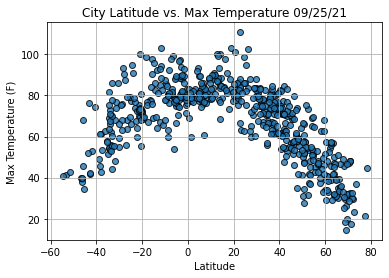

In [94]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

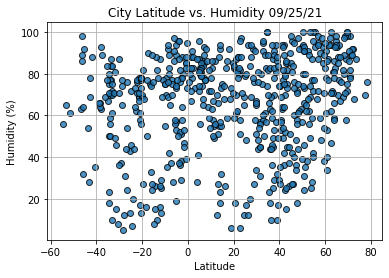

In [100]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

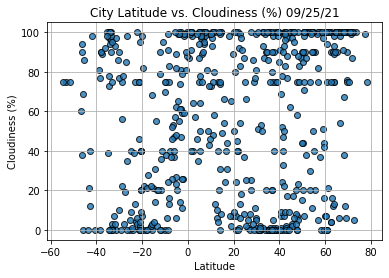

In [102]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black" , linewidths=1, marker="o",
            alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

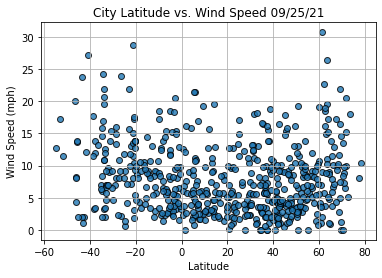

In [103]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [104]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [106]:
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2021-09-25 14:55:44
Lat                      -38.0023
Lng                      -57.5575
Max Temp                     61.0
Humidity                       63
Cloudiness                     90
Wind Speed                  11.99
Name: 13, dtype: object

In [107]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
578     True
579     True
580     True
581     True
582    False
Name: Lat, Length: 583, dtype: bool

In [109]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Gushikawa,JP,2021-09-25 14:55:42,26.3544,127.8686,83.43,94,1,6.91
2,Arlit,NE,2021-09-25 14:55:42,18.7369,7.3853,103.10,6,2,8.52
5,Sitka,US,2021-09-25 14:55:43,57.0531,-135.3300,46.29,87,75,9.22
6,Yellowknife,CA,2021-09-25 14:55:43,62.4560,-114.3525,45.41,100,90,5.75
7,Bata,GQ,2021-09-25 14:55:43,1.8639,9.7658,79.27,78,98,7.63


In [110]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

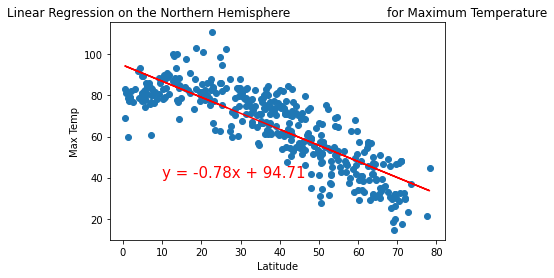

In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

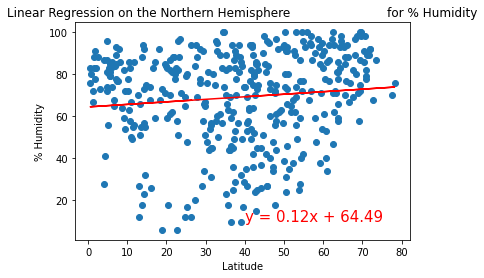

In [114]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [118]:
percent_cloudiness_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
latitide_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

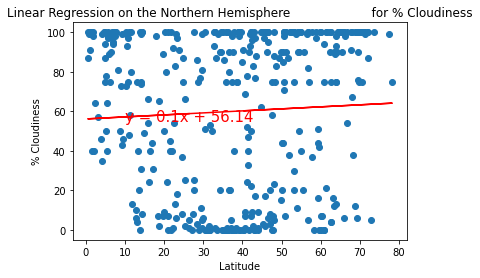

In [129]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

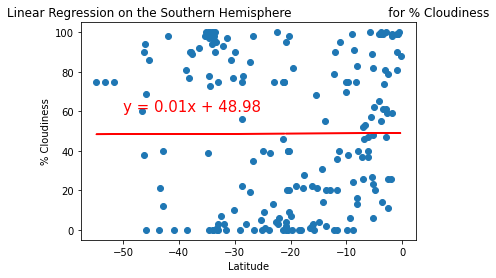

In [131]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

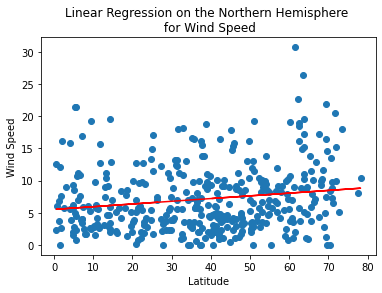

In [133]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

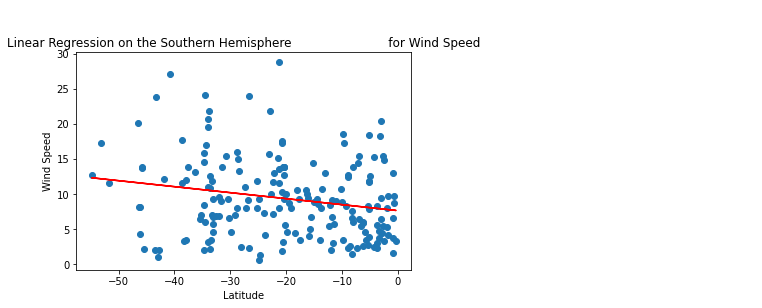

In [140]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))